Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Nate Schaefer"
COLLABORATORS = "Nick Hageman"

---

# Introduction to k-Nearest Neighbor (k-NN) Regression

In [29]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, neighbors,
                     model_selection as skms,
                     linear_model, metrics)

## Example of the train/test workflow in sklearn for regression

In [30]:
# obtain diabetes dataset
diabetes = datasets.load_diabetes()

# split into training/testing datasets (25% for testing)
(diabetes_train_ftrs, 
 diabetes_test_ftrs,
 diabetes_train_tgt, 
 diabetes_test_tgt) = skms.train_test_split(diabetes.data,
                                            diabetes.target,
                                            test_size=.25)

# define regression model (currently k-NN regression, but 
# you may uncomment the following line for linear regression)
model = neighbors.KNeighborsRegressor(n_neighbors=3)
#model = linear_model.LinearRegression()

# train the model
fit = model.fit(diabetes_train_ftrs, diabetes_train_tgt)

# apply trained model to test-set features
predictions = fit.predict(diabetes_test_ftrs)

# evaluate regression approach with root mean square error
score = np.sqrt(metrics.mean_squared_error(diabetes_test_tgt,
                                          predictions))
print(f'Model RMSE: {score:0.2f}')

Model RMSE: 69.06


Below we briefly further explore the diabetes dataset that was used above to illustrate an example train/test workflow for regression problems

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.052606,0.050680,-0.024529,0.056301,-0.007073,-0.005072,-0.021311,-0.002592,0.026714,-0.038357,110.0
1,0.034443,-0.044642,0.018584,0.056301,0.012191,-0.054549,-0.069172,0.071210,0.130081,0.007207,273.0
2,-0.001882,-0.044642,0.068163,-0.005671,0.119515,0.130208,-0.024993,0.086708,0.046132,-0.001078,121.0
3,0.023546,0.050680,-0.020218,-0.036656,-0.013953,-0.015092,0.059685,-0.039493,-0.096433,-0.017646,47.0
4,0.030811,-0.044642,0.104809,0.076958,-0.011201,-0.011335,-0.058127,0.034309,0.057104,0.036201,270.0


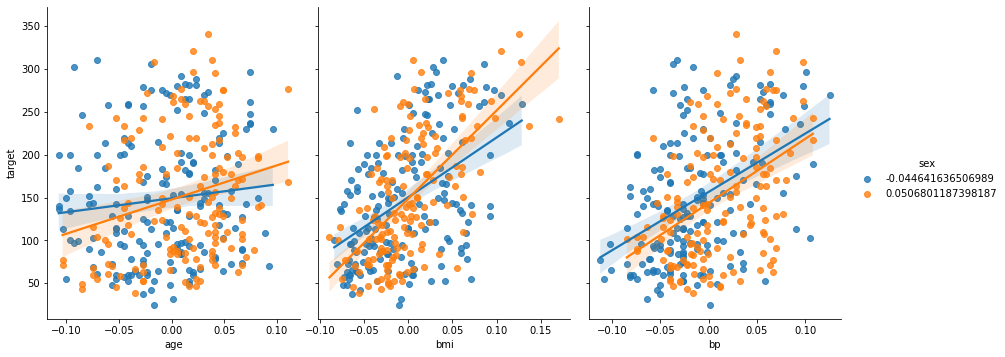

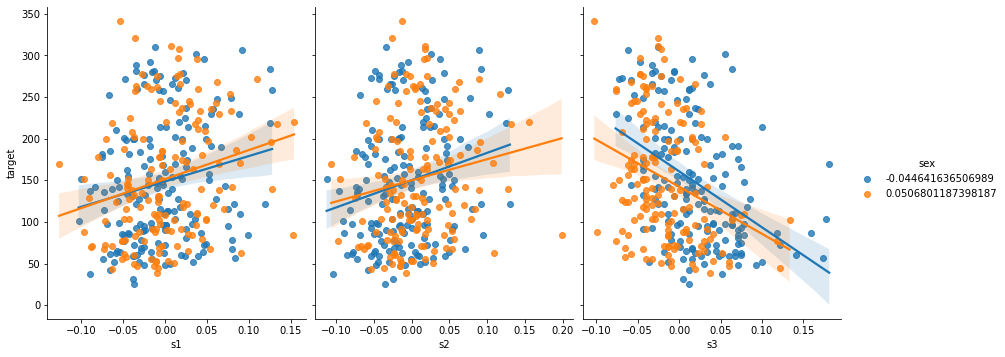

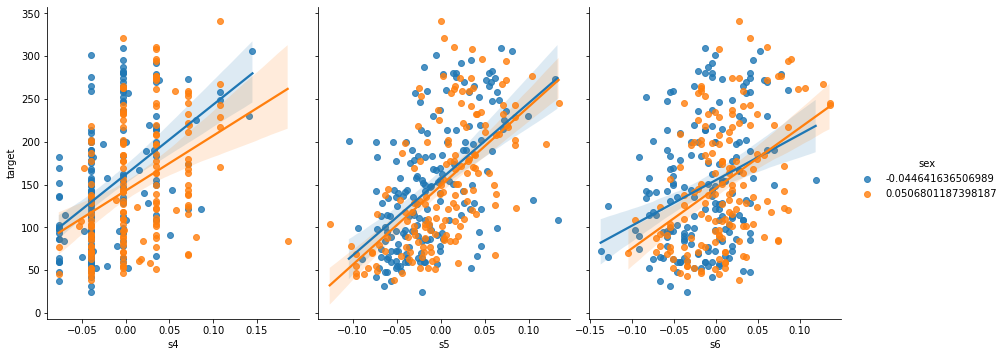

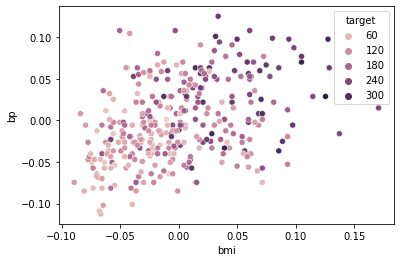

In [31]:
# create training pandas DataFrame for increased visualization
diabetes_train_df = pd.DataFrame(diabetes_train_ftrs,
                                 columns = diabetes.feature_names)
diabetes_train_df['target'] = diabetes_train_tgt
display(diabetes_train_df.head())
sns.pairplot(diabetes_train_df, x_vars=["age","bmi","bp"], y_vars=["target"],
             hue="sex", height=5, aspect=.8, kind="reg");
sns.pairplot(diabetes_train_df, x_vars=["s1","s2","s3"], y_vars=["target"],
             hue="sex", height=5, aspect=.8, kind="reg");
sns.pairplot(diabetes_train_df, x_vars=["s4","s5","s6"], y_vars=["target"],
             hue="sex", height=5, aspect=.8, kind="reg");
plt.show();

sns.scatterplot(x="bmi",y="bp",hue="target",data=diabetes_train_df);
plt.show();

# for figure in notes:
#reduced_df = diabetes_train_df[diabetes_train_df['bmi'] > 0.10]
#display(reduced_df[['bmi','bp','target']])
#sns.scatterplot(x="bmi",y="bp",hue="target",data=reduced_df,legend='full');

## Assignment, Part I: Compute RMSE between diabetes_test_tgt and predictions without calling metrics.mean_squared_error

In the cell below, compute (and display) the root mean square error (RMSE) between predicted targets (predictions) and the actual targets (diabetes_test_tgt) WITHOUT calling metrics.mean_squared_error. Recall that the root mean square error between predictions and diabetes_test_tgt (given n values in each) can be defined as:

$rmse = \sqrt{\frac{\sum_{i=0}^{n-1}{(predictions[i]-diabetes\_test\_tgt[i])^2}}{n}}$

Hint: even though you may not call metrics.mean_squared_error, you may still call np.sqrt, np.mean and/or np.sum

In [32]:
# YOUR CODE HERE
#raise NotImplementedError()

rmse = np.sqrt((np.sum((predictions - diabetes_test_tgt)**2))/len(predictions))

print(f'rmse={rmse:0.2f}')



rmse=69.06


## Example use of k-NN regression to predict number of season wins from College Football 2019 dataset.

We have previously used the College Football 2019 dataset with k-NN classification (e.g., predicting bowl eligibility). Here we will explore using the same dataset to predict the number of season wins. Below, we extract a subset of the columns in a similar fashion as was done previously (with the addition of removing the Iowa row so that we can use it later). 

In [33]:
# load 2019 College Football dataset and extract desired information
cfb_orig_df = pd.read_csv("CFB2019.csv")
# extract bowl eligibility from the Wins-Loss column
# first separate Win-Loss into 2D array of Win and Loss strings
w_l = np.array([w_l_str.split('-') for w_l_str in cfb_orig_df['Win-Loss']])
# extract first column as wins (and convert to integers)
wins = w_l[:,0].astype(int)

# extract some of the existing columns as a starting point for our smaller dataset
cfb_df = cfb_orig_df[['Rushing Yards per Game',
                      'Rush Yards Per Game Allowed',
                      'Pass Yards Per Game',
                      'Pass Yards Per Game Allowed']].copy()
# add the wins column
cfb_df['Wins'] = wins
# make the team column the index labels
cfb_df.index = cfb_orig_df['Team']

# remove Iowa so that not used for training/testing 
# (as we will perform a separate prediction later)
iowa_values = cfb_df.loc['Iowa (Big Ten)',:]
print(iowa_values)
cfb_df.drop('Iowa (Big Ten)',inplace=True)

# display first five rows
display(cfb_df.head())

Rushing Yards per Game         137.6
Rush Yards Per Game Allowed    112.5
Pass Yards Per Game            228.9
Pass Yards Per Game Allowed    195.7
Wins                            10.0
Name: Iowa (Big Ten), dtype: float64


,Rushing Yards per Game,Rush Yards Per Game Allowed,Pass Yards Per Game,Pass Yards Per Game Allowed,Wins
Team,,,,,
Air Force (Mountain West),298.5,100.5,123.2,219.1,11
Akron (MAC),47.6,213.5,195.6,200.4,0
Alabama (SEC),168.5,137.2,342.2,187.2,11
Appalachian St. (Sun Belt),231.4,129.4,201.7,206.7,13
Arizona (Pac-12),174.0,181.6,266.1,289.8,4


Below we apply a k-NN (k=3) regression model for training/testing and display the resulting root mean squre error (RMSE) on the test set.

In [34]:
# separate features from targets
# obtain target as the wins column
cfb_target = cfb_df['Wins']
# obtain features as the DataFrame with the wins column dropped
cfb_features = cfb_df.drop(['Wins'],axis=1)


# separate into train and test sets (30% of data for testing)
(cfb_train_ftrs, cfb_test_ftrs,
 cfb_train_tgt, cfb_test_tgt) = skms.train_test_split(cfb_features,
                                                      cfb_target,
                                                      test_size=.30)

# set up k-NN (k=3) regression model
model = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = model.fit(cfb_train_ftrs, cfb_train_tgt)

# apply trained model to test data and evaluate using rmse
predictions = fit.predict(cfb_test_ftrs)
score = np.sqrt(metrics.mean_squared_error(cfb_test_tgt,
                                           predictions))
print(f'Model RMSE: {score:0.2f}')

Model RMSE: 2.34


## Assignment, Part II
Recall that in setting up the pandas DataFrame to store the data, we removed the row containing the Iowa data (and saved it as iowa_values). This ensured that the Iowa row was NOT part of the original training set. Your task in the cell below will be to determine the predicted number of wins for Iowa using k-NN (k=3) regression in two ways:
* A) First, you should determine the predicted number of wins by NOT using the trained sklearn k-NN model determined above. In particular, you should first compute the distance from the Iowa features to the features from each team in the training set (note: it may be helpful to save these distances in an additional column of a copied version of the training DataFrame as we have done in the past for k-NN classification). Next, you should determine the three "closest" teams (as used for k-NN classification, use of sort_values should be helpful to determine the closest three teams assuming you added the distance as an extra column in the DataFrame). (At this point, it may also be helpful to save these three teams in their own pandas Dataframe and display them.) Finally, you should compute the mean number of wins from these three teams and use this as your predicted number of wins for Iowa. 
* B) Second, you should use the predict function on the trained k-NN regression model to determine the predicted number of wins. 

You should obtain the same answer using both approaches.

In [49]:
# feature values defined below for your convenience (but you may
# obtain them in a different way if you prefer)
ia_rush_per_game = iowa_values['Rushing Yards per Game']
ia_rush_per_game_allowed = iowa_values['Rush Yards Per Game Allowed']
ia_pass_per_game = iowa_values['Pass Yards Per Game']
ia_pass_per_game_allowed = iowa_values['Pass Yards Per Game Allowed']
ia_wins = iowa_values['Wins']

# YOUR CODE HERE PartII A
#raise NotImplementedError()
ia_df = cfb_train_ftrs.copy()

ia_distances = np.sqrt(((cfb_features['Rushing Yards per Game'] - ia_rush_per_game)**2)
                 + (cfb_features['Rush Yards Per Game Allowed'] - ia_rush_per_game_allowed)**2
                 + (cfb_features['Pass Yards Per Game'] - ia_pass_per_game)**2
                 + (cfb_features['Pass Yards Per Game Allowed'] - ia_pass_per_game_allowed)**2
)

print('dist = ', ia_distances)

ia_df['Distance'] = ia_distances
ia_df['Wins'] = cfb_train_tgt

display(ia_df)

ia_sorted = ia_df.sort_values('Distance')
top_three_df = ia_sorted.iloc[0:3,:]
display(top_three_df)

mean_three = np.mean(top_three_df['Wins'])
print(mean_three)

# Make an Iowa ftrs dataframe
# This simplifies the use of:  fit.predict()
iowa_ftrs_df = pd.DataFrame([iowa_values])
iowa_ftrs_df = iowa_ftrs_df.drop("Wins",axis=1)
print("iowa_ftrs_df:")
display(iowa_ftrs_df)


# YOUR CODE HERE PartII B
#raise NotImplementedError()

predictions = fit.predict(iowa_ftrs_df)
print(predictions)

dist =  Team
Air Force (Mountain West)     194.300952
Akron (MAC)                   139.398637
Alabama (SEC)                 120.308104
Appalachian St. (Sun Belt)     99.724069
Arizona (Pac-12)              127.821829
                                 ...    
West Virginia (Big 12)         93.165337
Western Ky. (C-USA)            39.415860
Western Mich. (MAC)           106.140049
Wisconsin (Big Ten)           100.895342
Wyoming (Mountain West)       135.289652
Length: 129, dtype: float64


,Rushing Yards per Game,Rush Yards Per Game Allowed,Pass Yards Per Game,Pass Yards Per Game Allowed,Distance,Wins
Team,,,,,,
Cincinnati (AAC),208.0,138.6,182.3,222.8,92.430190,11
Troy (Sun Belt),143.1,157.8,313.2,276.3,125.240529,5
Ga. Southern (Sun Belt),253.2,136.3,74.5,242.8,199.968923,7
Western Mich. (MAC),205.1,181.6,240.6,238.1,106.140049,7
Oklahoma St. (Big 12),229.6,158.5,224.3,253.8,118.223390,8
...,...,...,...,...,...,...
Kansas (Big 12),145.8,225.7,231.5,249.5,125.629137,3
Penn St. (Big Ten),190.6,95.0,221.3,251.5,79.288398,11
UCLA (Pac-12),150.2,145.5,255.5,310.8,123.301784,4


,Rushing Yards per Game,Rush Yards Per Game Allowed,Pass Yards Per Game,Pass Yards Per Game Allowed,Distance,Wins
Team,,,,,,
Miami FL (ACC),118.1,114.6,249.2,195.2,28.231188,6
Michigan (Big Ten),150.7,121.7,250.8,185.5,28.981028,9
Tennessee (SEC),144.2,140.5,221.4,194.0,29.777508,8


7.666666666666667
iowa_ftrs_df:


,Rushing Yards per Game,Rush Yards Per Game Allowed,Pass Yards Per Game,Pass Yards Per Game Allowed
Iowa (Big Ten),137.6,112.5,228.9,195.7


[7.66666667]


## Ideas for optional other things to try (not required):

* Compute accuracy after converting number of wins from cfb_test_tgt and the predictions to a bowl eligibility True/False value (defined as >= 6 wins)
* Try out computing a weighted mean of the k-nearest neighbors (k=3) for the Iowa case above and compare the resulting predicted value with that using model = neighbors.KNeighborsRegressor(n_neighbors=3,weights='distance') Note: The weights can be computed as the inverse distance divided by the summation of all of the inverse distances for all of the $k$ nearest neighbors. 

In [52]:
# YOUR OPTIONAL CODE HERE
predictions = fit.predict(cfb_test_ftrs)

bowl_eligible_actual = cfb_test_tgt >= 6
bowl_eligible_predicted = predictions >= 6

score2 = metrics.accuracy_score(bowl_eligible_actual, bowl_eligible_predicted)

print('accuracy of bowl predictions: ', score2)
inverse_dist = 1/top_three_df['Distance']
weights = inverse_dist/inverse_dist.sum()
weighted_mean = np.dot(top_three_df['Wins'], weights)

print('predicted wins weighted =', weighted_mean)

# same way with kNN Regressor

model_weighted = neighbors.KNeighborsRegressor(n_neighbors=3,weights='distance')
fit_weighted = model_weighted.fit(cfb_train_ftrs, cfb_train_tgt)
predictions_weighted = fit_weighted.predict(iowa_ftrs_df)

#print the predictions_weighted

print("Weighted predictions: ", predictions_weighted)


accuracy of bowl predictions:  0.7435897435897436
predicted wins weighted = 7.648937655217509
Weighted predictions:  [7.64893766]
